## 1. wildfires_1985-1999

In [1]:
import geopandas

In [2]:
# import the shapefile with wildfires

fires1 = geopandas.read_file(r"Data_part-2_myTurn/wildfires_1985-1999.shp")

In [3]:
fires1

,Event_ID,irwinID,Incid_Name,Incid_Type,Map_ID,Map_Prog,Asmnt_Type,BurnBndAc,BurnBndLat,BurnBndLon,...,dNBR_offst,dNBR_stdDv,NoData_T,IncGreen_T,Low_T,Mod_T,High_T,Comment,ORIG_FID,geometry
0,AK6244915566819850730,None,SELATNA,Wildfire,4773,MTBS,Extended,7382,62.449,-155.668,...,61,-9999,-970,-150,175,440,750,None,197,POINT (-3308976.225 5370152.682)
1,AK6256215664519850720,None,SUGARLOAF,Wildfire,4738,MTBS,Extended,5489,62.562,-156.645,...,3,-9999,-970,-150,70,320,600,None,198,POINT (-3349139.671 5413232.076)
2,AK6260315742119850801,None,CAMELBACK,Wildfire,4737,MTBS,Extended,4780,62.603,-157.421,...,27,-9999,-970,-150,130,334,585,None,199,POINT (-3383487.781 5443901.288)
3,AK6283615543219850803,None,KATLITNA,Wildfire,4770,MTBS,Extended,9522,62.836,-155.432,...,95,-9999,-970,-150,185,438,740,None,200,POINT (-3275752.604 5392309.730)
4,AK6293715788819850728,None,531021,Wildfire,4763,MTBS,Extended,7295,62.937,-157.888,...,-11,-9999,-970,-150,20,275,550,None,201,POINT (-3385947.488 5486211.592)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6128,WY4362011069119990506,None,S.GROSVENT,Prescribed Fire,10865,MTBS,Initial (SS),1665,43.620,-110.691,...,-9999,-9999,9999,9999,70,-9999,-9999,None,6325,POINT (-1175867.225 2383023.832)
6129,WY4362710700019990819,None,OUTLAW,Wildfire,10608,MTBS,Extended,1426,43.627,-107.000,...,26,-9999,-970,-150,60,241,460,None,6326,POINT (-881891.047 2343776.336)
6130,WY4388710883219990315,None,LOWER GRAS,Prescribed Fire,10615,MTBS,Initial,5910,43.887,-108.832,...,185,-9999,-970,-150,105,325,9999,None,6327,POINT (-1024085.737 2390908.951)
6131,WY4389910558419991031,None,CLARKELEN,Wildfire,10609,MTBS,Initial,21432,43.899,-105.584,...,-33,-9999,-970,-150,25,280,9999,None,6328,POINT (-765769.590 2361693.315)


In [4]:
fires1.shape

(6133, 24)

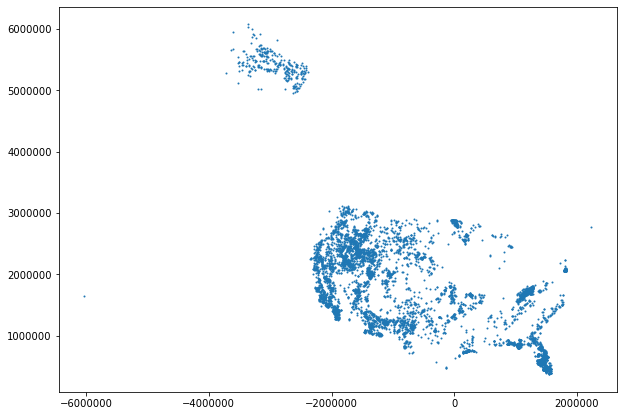

In [5]:
fires1.plot(markersize=1, figsize=(10,10))

In [6]:
# import the shapefile with all of the state boundaries

states = geopandas.read_file(r"Data/110m_cultural/ne_110m_admin_1_states_provinces.shp")

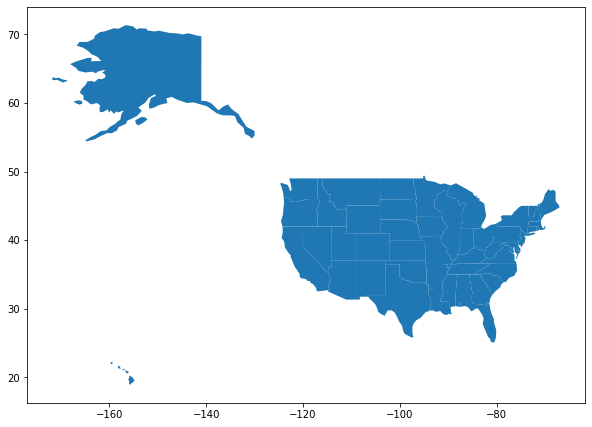

In [7]:
states.plot(markersize=1, figsize=(10,10))

In [8]:
states.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
fires1.crs

<Projected CRS: ESRI:102039>
Name: USA_Contiguous_Albers_Equal_Area_Conic_USGS_version
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [10]:
# reproject the fires1 shapefile to WGS84

fires1 = fires1.to_crs("epsg:4326")

In [11]:
state_fires1 = geopandas.sjoin(fires1,states[['name','geometry']].copy(),op='within')

In [12]:
counts_per_state = state_fires1.groupby('name').size()
counts_per_state.sort_values(axis=0, ascending=False)

name
Florida           983
California        762
Idaho             525
Nevada            362
New Mexico        352
Arizona           325
Oregon            309
Alaska            280
Utah              245
West Virginia     211
Texas             203
Montana           180
Minnesota         146
Kentucky          130
Washington        114
Kansas            112
Wyoming            97
Colorado           87
Georgia            85
Missouri           81
Oklahoma           76
New Jersey         64
South Dakota       62
Louisiana          56
North Carolina     43
Tennessee          33
Nebraska           32
South Carolina     32
Alabama            29
Mississippi        26
Michigan           21
Virginia           20
North Dakota       19
Arkansas           13
Wisconsin           3
New York            2
Hawaii              1
Maine               1
Indiana             1
dtype: int64

In [13]:
states = states.merge(counts_per_state.reset_index(name='number_of_fires'))

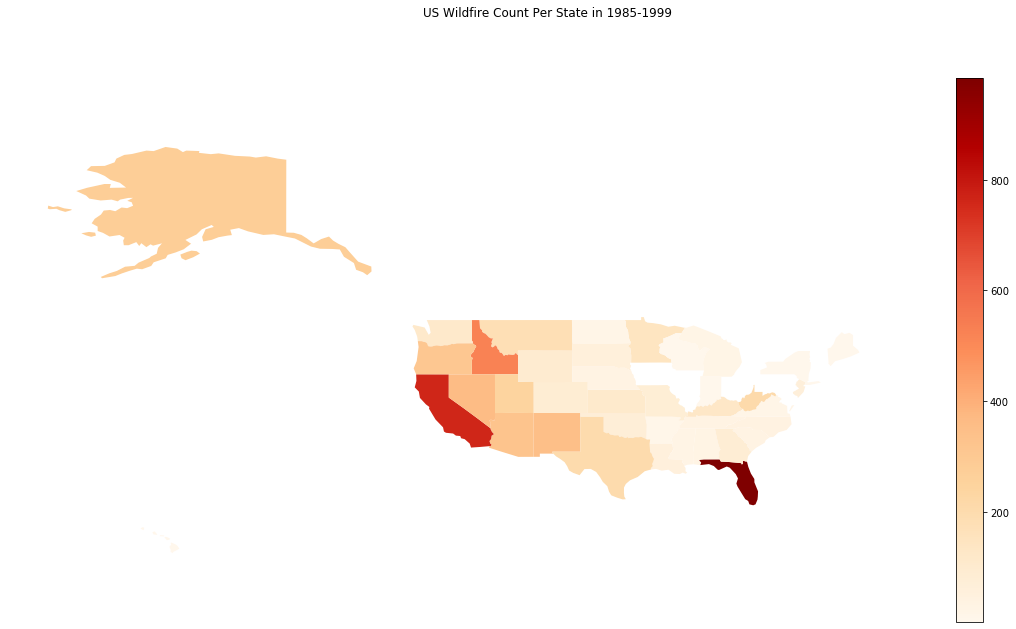

In [14]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, figsize=(20,10))
ax = states.plot(column='number_of_fires', cmap='OrRd',
legend=True, ax=ax)
lims = plt.axis('equal')
f.suptitle('US Wildfire Count Per State in 1985-1999')
ax.set_axis_off()
plt.show()

Explaination:
    
The choropleth map that shows the total wildfires in the US from 1985-1999. the largest number of fires in Florida, California, and Idaho. Hawaii, Maine, and Indiana had one fire.
For plotting the map, first, I uploaded all the data on wildfires in each state of the United States from 1985 to 1999. Save them in Jupyter's folder. And start with importing the module ‘geopandas’. Then, I import the shapefile with all of the state boundaries and using the same procedure for data of ‘wildfires in 1985-1999’, which is defined as ‘fires1’. Now I overlay the data of  ‘wildfires in 1985-1999’ with state geometries using of a spatial join using the sjoin method. For make sure that the data uses the same map projection. I verify it as ‘fires1.crs’ and ‘states.crs’. then make both have same CRS. Next, I count the total wildfires per state and map the results. The list is a pandas series object showing the state name and total count. Sort from largest to smallest. At last, with matplotlib, plot a choropleth map by adding title, legend, size, and dropping the x-axis and y-axis to fine-tune.
